In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
store = pd.read_csv('C:/Users/rlaeo/OneDrive/바탕 화면/머신러닝/챕터1/m_store1.csv')
area = pd.read_csv('C:/Users/rlaeo/OneDrive/바탕 화면/머신러닝/챕터1/m_area1.csv')
order4 = pd.read_csv('C:/Users/rlaeo/OneDrive/바탕 화면/머신러닝/챕터1/tbl_order_2021041.csv')
order5 = pd.read_csv('C:/Users/rlaeo/OneDrive/바탕 화면/머신러닝/챕터1/tbl_order_2021051.csv')
order6 = pd.read_csv('C:/Users/rlaeo/OneDrive/바탕 화면/머신러닝/챕터1/tbl_order_2021061.csv')

In [9]:
from IPython.display import display, clear_output
from ipywidgets import Dropdown

order_data = pd.merge(order4,store,on='store_id',how='left')
order_data = pd.merge(order_data,area,on='area_cd',how='left')

order_data.loc[order_data['takeout_flag']==0,'takeout_name']='delivery'
order_data.loc[order_data['takeout_flag']==1,'takeout_name']='takeout'

order_data.loc[order_data['status']==0,'status_name'] = '주문 접수'
order_data.loc[order_data['status']==1,'status_name'] = '결제 완료'
order_data.loc[order_data['status']==2,'status_name'] = '배달 완료'
order_data.loc[order_data['status']==9,'status_name'] = '주문 취소'

def order_by_store(val):
    clear_output()
    display(dropdown)
    pick_data = order_data.loc[(order_data['store_name']==val['new'])&
                               (order_data['status'].isin([1,2]))]
    display(pick_data.head())

store_list = store['store_name'].tolist()

dropdown = Dropdown(options=store_list,description='지역 선택:')
dropdown.observe(order_by_store, names='value')
display(dropdown)

Dropdown(description='지역 선택:', index=191, options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점'…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
1538,96503067,192,C94007279,27,16024834,2021-04-01 13:11,2021-04-01 13:25,0,21120,2,부흥로점,GB,경기,경기북부,delivery,배달 완료
1542,1350226,192,C06217869,82,29234966,2021-04-01 13:12,2021-04-01 13:37,1,20640,1,부흥로점,GB,경기,경기북부,takeout,결제 완료
1764,5734439,192,C89580880,31,64284116,2021-04-01 13:31,2021-04-01 14:08,0,22380,2,부흥로점,GB,경기,경기북부,delivery,배달 완료
2349,47449990,192,C79289456,20,57340472,2021-04-01 14:24,2021-04-01 14:52,0,21220,2,부흥로점,GB,경기,경기북부,delivery,배달 완료
2597,34423384,192,C79372919,53,69533910,2021-04-01 14:46,2021-04-01 15:45,0,31200,2,부흥로점,GB,경기,경기북부,delivery,배달 완료


Dropdown(index=13, options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산로점', '남부순환로점', '성내…

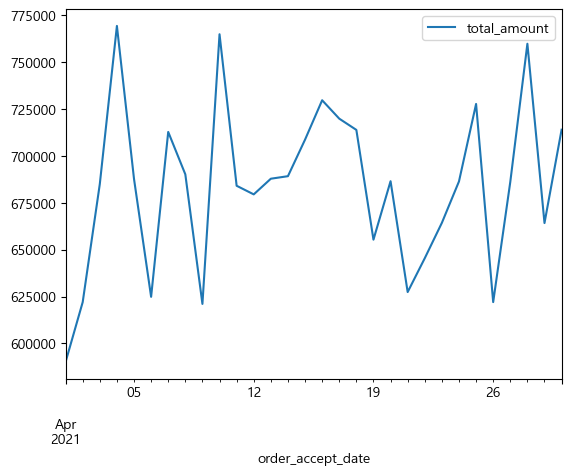

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
if os.name == 'nt':
    plt.rc('font',family='Malgun Gothic')
elif os.name == 'posix':
    plt.rc('font',family = 'AllieGothic')

plt.rcParams['axes.unicode_minus'] = False

def graph_by_store(val):
    clear_output()
    display(dropdown2)
    pick_data = order_data.loc[(order_data['store_name']==val['new'])&
                               (order_data['status'].isin([1,2]))]
    temp = pick_data[['order_accept_date','total_amount']].copy()
    temp.loc[:,'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date',inplace=True)
    temp.resample('D').sum().plot()#d는 일단위 표시
dropdown2 = Dropdown(options=store_list)
dropdown2.observe(graph_by_store,names='value')
display(dropdown2)

In [11]:
#여러 매장
from ipywidgets import SelectMultiple
def order_by_multi(val):
    clear_output()
    display(select)
    pick_data = order_data.loc[(order_data['store_name'].isin(val['new']))&
                               (order_data['status'].isin([1,2]))]
    display(pick_data.head())
select = SelectMultiple(options=store_list)
select.observe(order_by_multi,names='value')
display(select)


SelectMultiple(options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산로점', '남부순환로점', '성내로점',…

In [12]:
def graph_by_multi(val):
    clear_output()
    display(select2)

    fig = plt.figure(figsize = (17,4))
    plt.subplots.adjust(wspace=0.25,hspace=0.6)
    i=0
    for trg in val['new']:
        pick_data = order_data[
            (order_data['store_name']==trg)&
            (order_data['status'].isin([1,2]))]
        temp = pick_data[['order_accept_date',
                          'total_amount','store_name']].copy()
        temp.loc[:,'order_accept_date'] = \
            pd.to_datetime(temp['order_accept_date'])
        temp.set_index('order_accept_date',inplace=True)
        i += 1
        ax = fig.add_subplot(1,len(val['new']),i)
        ax.plot(temp.resample('D').sum())
        ax.set_title(trg)

    select2 = SelectMultiple(options=store_list,
                             description='매장 선택:')
    select2.observe(graph_by_multi,names='value')
    display(select2)

In [13]:
from ipywidgets import IntSlider
def store_lower(val):
    clear_output()
    display(slider)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size()<val['new']])

slider = IntSlider(value=1100,min=1000,max=2000,step=100,description='건수:',)
slider.observe(store_lower,names='value')
display(slider)

IntSlider(value=1100, description='건수:', max=2000, min=1000, step=100)